## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas
import pickle
from ScoringAndEvaluation import Get_Class_Probabilities, Evaluate_Predictions
%matplotlib inline 



## SET FILE LOCATION, LOCATION TO TEST DATA AND MODEL FILE

In [2]:
dirpath = '..\\..\\outputs'

# Transformed test data for scoring
transformed_test_file = dirpath + "\\test_data_engineered.pkl"
inFile = open(transformed_test_file, 'rb')
testDataFrame = pickle.load(inFile)
inFile.close()

## Model files
RandomForest_model_file = dirpath + '\\CVRandomForestModel.pkl'
ElasticNet_model_file = dirpath + '\\CVElasticNetModel.pkl'

## PDF files for output of ROC plots
RandomForestROCplotpath = dirpath + '\\RandomForestROCCurve.pdf'
ElasticNetROCplotpath = dirpath + '\\ElasticNetROCCurve.pdf'

## PERFORM SCORING AND EVALUATION

Random Forest AUC: 0.917
ElasticNet AUC: 0.897


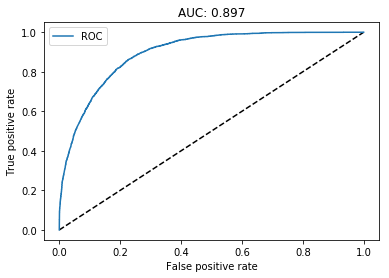

In [3]:
# LOAD TEST DATA
y_test = testDataFrame["income"].values
X_test = testDataFrame.drop("income", axis=1)

# RANDOMFOREST MODEL
y_pred = Get_Class_Probabilities(transformed_test_file, RandomForest_model_file);
RFAuc = Evaluate_Predictions(y_pred, y_test, RandomForestROCplotpath)
print ("Random Forest AUC: " + str(round(RFAuc, 3)))

# ELASTICNET MODEL
y_pred = Get_Class_Probabilities(transformed_test_file, ElasticNet_model_file);
EnetAuc = Evaluate_Predictions(y_pred, y_test, ElasticNetROCplotpath)
print ("ElasticNet AUC: " + str(round(EnetAuc, 3)))
